[*********************100%%**********************]  1 of 1 completed

tickers: ['AMZN']
time window = warmup-date: 2023-04-12, start-date: 2023-08-10, end-data: 2024-08-09
2023-08-10, AMZN, close:  138.56,  rsi: 60.45, rsi-ma: 59.13, position: 0.00, pnl-pct: 0.00%
2023-08-11, AMZN, close:  138.41,  rsi: 60.14, rsi-ma: 59.20, position: 0.00, pnl-pct: 0.00%
2023-08-14, AMZN, close:  140.57,  rsi: 63.08, rsi-ma: 59.48, position: 0.00, pnl-pct: 0.00%
2023-08-15, AMZN, close:  137.67,  rsi: 56.99, rsi-ma: 59.30, position: 0.00, pnl-pct: 0.00%
2023-08-16, AMZN, close:  135.07,  rsi: 52.14, rsi-ma: 58.79, position: 0.00, pnl-pct: 0.00%
2023-08-17, AMZN, close:  133.98,  rsi: 50.21, rsi-ma: 58.18, position: 0.00, pnl-pct: 0.00%


2023-08-18, AMZN, close:  133.22,  rsi: 48.85, rsi-ma: 57.51, position: 0.00, pnl-pct: 0.00%
2023-08-21, AMZN, close:  134.68,  rsi: 51.56, rsi-ma: 57.09, position: 0.00, pnl-pct: 0.00%
2023-08-22, AMZN, close:  134.25,  rsi: 50.71, rsi-ma: 56.63, position: 0.00, pnl-pct: 0.00%
2023-08-23, AMZN, close:  135.52,  rsi: 53.17, rsi-ma: 56.38, position: 0.00, pnl-pct: 0.00%
2023-08-24, AMZN, close:  131.84,  rsi: 46.00, rsi-ma: 55.64, position: 0.00, pnl-pct: 0.00%
2023-08-25, AMZN, close:  133.26,  rsi: 48.86, rsi-ma: 55.16, position: 0.00, pnl-pct: 0.00%
2023-08-28, AMZN, close:  133.14,  rsi: 48.63, rsi-ma: 54.69, position: 0.00, pnl-pct: 0.00%
2023-08-29, AMZN, close:  134.91,  rsi: 52.27, rsi-ma: 54.52, position: 0.00, pnl-pct: 0.00%
2023-08-30, AMZN, close:  135.07,  rsi: 52.60, rsi-ma: 54.38, position: 0.00, pnl-pct: 0.00%
2023-08-31, AMZN, close:  138.01, *rsi: 58.27, rsi-ma: 54.66, position: 0.00, pnl-pct: 0.00%
2023-09-01, AMZN, close:  138.12,  rsi: 58.47, rsi-ma: 54.93, position

<IPython.core.display.Javascript object>

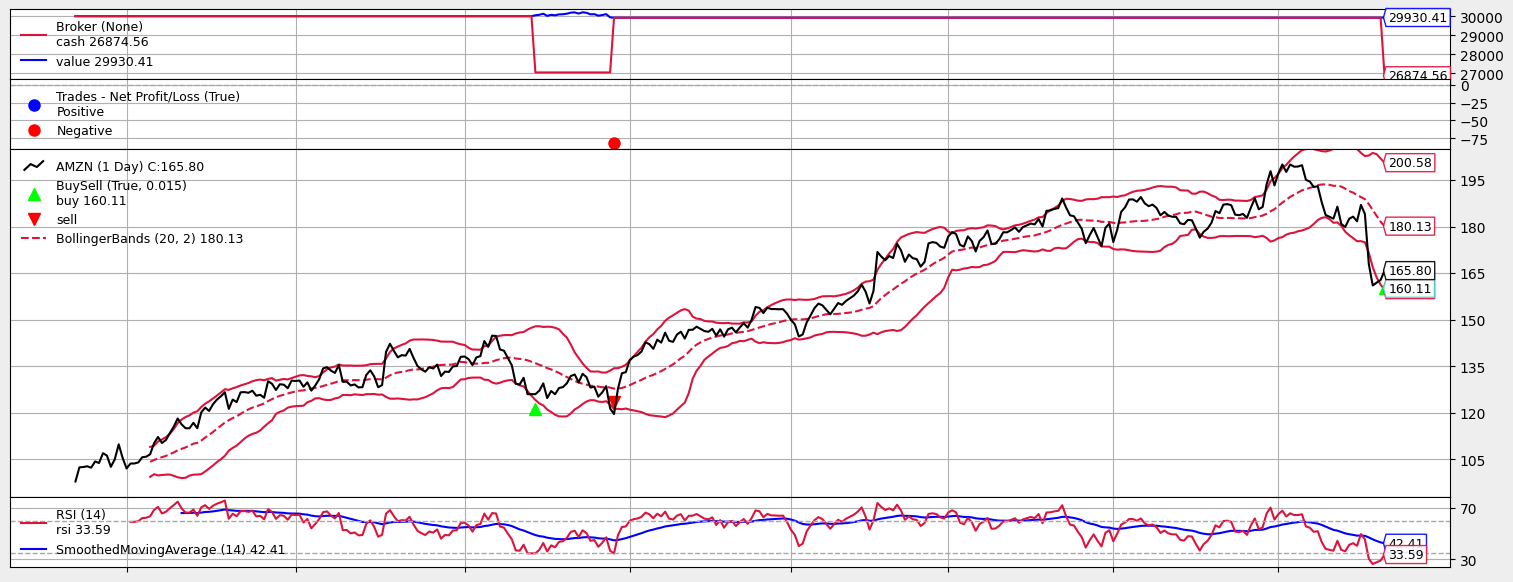

In [2]:
import conf

from services.backtesting_service import RsiBollingerStrategy
from optimise_common import *

import datetime  # For datetime objects
import backtrader as bt
import backtrader.analyzers as btanalyzers
import yfinance as yf

optimise = False
initial_cash = 30000

# strategy-controls
printlog=True
upper_rsi=60
lower_rsi=35
loss_pct_threshold = 8
profit_protection_pct_threshold = 0
fixed_investment_amount=3000
# backtest window 
num_years = 1
year_offset = 0

# stock to test
#tickers = non_tech_stock
#tickers = interesting_stock
tickers = ['AMZN']

warmup_date, start_date, end_date = optimisation_dates(num_years, year_offset)

def add_stats(rsi_lower, rsi_upper, loss_pct, profit_protection_pct_threshold, fixed_investment_amount, final_value):
    stats.append({'rsi_lower': rsi_lower, 
                  'rsi_upper': rsi_upper, 
                  'loss_pct': loss_pct,
                  'profit_protection_pct_threshold': profit_protection_pct_threshold,
                  'fixed_investment_amount': fixed_investment_amount ,
                  'final_value': final_value}) 

def strategy_completed_callback(strategy):
    final_value = strategy.broker.get_value()
    print("strategy_completed_callback stats: " + 
        f'lower_rsi: {strategy.params.lower_rsi}, ' +
        f'upper_rsi: {strategy.params.upper_rsi}, ' +
        f'loss_pct: {strategy.params.loss_pct_threshold}, ' +
        f'profit_protection_pct_threshold: {strategy.params.profit_protection_pct_threshold}, ' +
        f'fixed_investment_amount: {strategy.params.fixed_investment_amount}, ' +
        f'final Portfolio Value: {final_value:.0f}'
    )
    stats.append({'rsi_lower': strategy.params.lower_rsi, 
        'rsi_upper': strategy.params.upper_rsi, 
        'loss_pct': strategy.params.loss_pct_threshold,
        'profit_protection_pct_threshold': strategy.params.profit_protection_pct_threshold,
        'fixed_investment_amount': strategy.params.fixed_investment_amount,
        'final_value': round(strategy.broker.getvalue())}) 

stats = []

if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = create_cerebro()

    if not optimise:
        # Add a strategy (see strategy-controls)
        cerebro.addstrategy(RsiBollingerStrategy,
                            start_date = start_date,
                            printlog = printlog,
                            upper_rsi = upper_rsi,
                            lower_rsi = lower_rsi,
                            loss_pct_threshold = loss_pct_threshold,
                            profit_protection_pct_threshold = profit_protection_pct_threshold,
                            fixed_investment_amount = fixed_investment_amount)
    else:
        strats = cerebro.optstrategy(
            RsiBollingerStrategy,
            start_date = start_date,
            upper_rsi= 60 , # upper_rsi=range(55, 70, 5), RSI-upper down-crossing not wired
            lower_rsi = range(30, 60, 5), #, 40 
            loss_pct_threshold = 8, # range(1,15),
            profit_protection_pct_threshold = 0, #range(0, 100, 25),
            fixed_investment_amount = 5000, # range(500, 5500, 500),
            custom_callback=strategy_completed_callback,
            )
        cerebro.addanalyzer(btanalyzers.DrawDown, _name='drawdown')

    add_data_feed(cerebro, tickers, warmup_date, start_date, end_date)
    set_cash(cerebro, initial_cash)
    
    execute_cerebro(cerebro, optimise, stats)

    
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams #Creates parameters for our plot
if not optimise:
    print(f'Plotting graphs ...')
    # Plot the result
    rcParams['figure.figsize'] = 16, 6 * len(tickers) #size
    rcParams['figure.facecolor'] = '#eeeeee' #Color scheme
    plt.plot() #The Plot Code
    plt.close()
    cerebro.plot(iplot=True, volume=False)
 